In [ ]:
from tabpfn import TabPFNClassifier
from sklearn.ensemble import RandomForestClassifier

import experiments.runners as runners
from data import load_us_perm_visas, load_credit_default

rf_model = RandomForestClassifier()
pfn_model = TabPFNClassifier()

In [ ]:
# Instatiate run class that provides functions for training and evaluation
new_run = runners.run(rf_model, load_credit_default)

In [ ]:
# Inspect training data
new_run.X_train

In [ ]:
# Inspect pipeline
new_run.pipe

In [ ]:
# Ignore FutureWarning, of which TabPFNClassifier has a lot!
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
new_run.fit()

In [ ]:
new_run.predict()
# WARNING: TabPFN takes 50-54 min predicting both class and probability

In [ ]:
new_run.score()

## Work in progress: ROC
Below is code to make the ROC AUC methods work. There is a problem with the array dimensions

In [8]:
new_run.prob_predictions[:, 0]

array([0.9515236 , 0.958636  , 0.9733163 , ..., 0.8934503 , 0.93110967,
       0.08692816], shape=(6600,), dtype=float32)

In [9]:
new_run.y_test

52993     certified
66389     certified
305510    certified
25476     certified
346085    certified
            ...    
57304        denied
98914     certified
371527    certified
3463      certified
56735        denied
Name: case_status, Length: 6600, dtype: object

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(new_run.y_test, new_run.prob_predictions[:, 1], pos_label='certified')

# Calculate AUC score
auc_score = roc_auc_score(new_run.y_test, new_run.prob_predictions[:, 1])
print(f"ROC AUC: {auc_score}")

ROC AUC: 0.8627874742774848


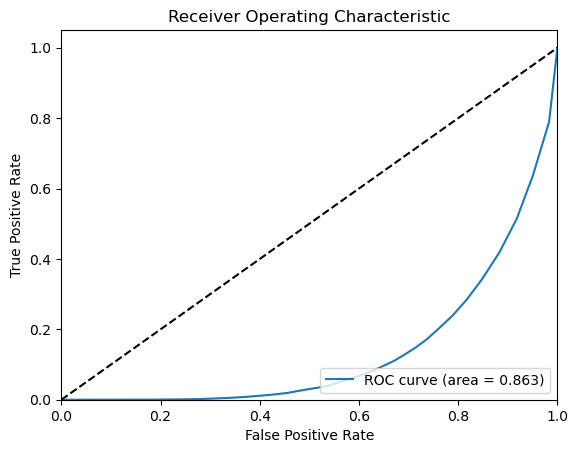

In [ ]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")